In [1]:
import ccxt
import pandas as pd
from IPython.display import display, HTML

# Function to fetch historical data with pagination
def fetch_december_data_paginated(symbol, timeframe='1d', since='2000-12-01T00:00:00Z', limit=500):
    exchange = ccxt.binance()
    all_data = []
    since_timestamp = exchange.parse8601(since)

    while True:
        # Fetch data
        ohlcv = exchange.fetch_ohlcv(symbol, timeframe=timeframe, since=since_timestamp, limit=limit)
        
        # Break if no data is returned
        if not ohlcv:
            break
        
        # Append the data
        all_data.extend(ohlcv)
        
        # Update the 'since' timestamp to the last timestamp from the fetched data
        since_timestamp = ohlcv[-1][0] + 1  # Add 1 millisecond to avoid overlap
    
    # Convert to DataFrame
    df = pd.DataFrame(all_data, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
    df.set_index('timestamp', inplace=True)

    # Filter for December only
    df = df[df.index.month == 12]

    # Extract year for the pivot table
    df['year'] = df.index.year
    df['date'] = df.index.strftime('%m-%d')  # Format dates as MM-DD for columns
    return df

# Function to calculate daily return (open to close)
def calculate_daily_return(df):
    df['daily_return'] = (df['close'] - df['open']) / df['open'] * 100
    return df

# Function to calculate daily max drawdown (open to low)
def calculate_daily_max_drawdown(df):
    df['daily_max_drawdown'] = (df['low'] - df['open']) / df['open'] * 100
    return df

# Function to calculate daily max runup (open to high)
def calculate_daily_max_runup(df):
    df['daily_max_runup'] = (df['high'] - df['open']) / df['open'] * 100
    return df

# Function to create and style the pivot table
def create_pivot_table_with_stats(df, value_column):
    # Create the pivot table
    pivot_table = df.pivot_table(values=value_column, index='year', columns='date', aggfunc='mean')

    # Calculate mean and median for each column
    avg_value = pivot_table.mean(axis=0)
    median_value = pivot_table.median(axis=0)

    # Calculate the number of positive values for each column (excluding Mean and Median rows)
    positive_count = (pivot_table > 0).sum(axis=0)  # Count positive values

    # Add the positive count row before Mean and Median rows
    pivot_table.loc['Positive Count'] = positive_count
    pivot_table.loc['Mean'] = avg_value
    pivot_table.loc['Median'] = median_value

    # Style the table
    def style_positive_cells(val):
        color = 'background-color: green' if val > 0 else ''
        return color

    styled_table = pivot_table.style \
        .applymap(style_positive_cells) \
        .set_table_styles([
            {'selector': 'thead th', 'props': [('background-color', '#4CAF50'), ('color', 'white'), ('font-weight', 'bold')]},
            {'selector': 'tbody td', 'props': [('text-align', 'center'), ('color', 'black')]},
            {'selector': 'tbody tr:nth-child(odd)', 'props': [('background-color', '#f2f2f2')]},
            {'selector': 'tbody tr:nth-child(even)', 'props': [('background-color', '#ffffff')]},
            {'selector': 'table', 'props': [('border-collapse', 'collapse'), ('width', '100%')]},
            {'selector': 'th', 'props': [('padding', '8px')]},
            {'selector': 'td', 'props': [('padding', '8px'), ('border', '1px solid #ddd')]},
            {'selector': 'tbody tr', 'props': [('color', 'blue')]},
        ]) \
        .set_table_attributes('class="dataframe"')

    return styled_table

# Function to display the table with a title
def display_table(title, styled_table):
    display(HTML(f"<h3>{title}</h3>"))
    display(styled_table)

# Main function to fetch data, process it, and display the results
def main_december():
    # Fetch data
    symbol = 'ETH/USDT'
    eth_data = fetch_december_data_paginated(symbol)

    # Calculate daily return
    eth_data = calculate_daily_return(eth_data)

    # Calculate daily max drawdown
    eth_data = calculate_daily_max_drawdown(eth_data)

    # Calculate daily max runup
    eth_data = calculate_daily_max_runup(eth_data)

    # Create and display the pivot table for daily return
    styled_table_return = create_pivot_table_with_stats(eth_data, 'daily_return')
    display_table("ETH/USDT Daily Returns for December (Open to Close, with Mean, Median, and Positive Count)", styled_table_return)

    # Create and display the pivot table for daily max drawdown
    styled_table_drawdown = create_pivot_table_with_stats(eth_data, 'daily_max_drawdown')
    display_table("ETH/USDT Daily Max Drawdown for December (Open to Low, with Mean, Median, and Positive Count)", styled_table_drawdown)

    # Create and display the pivot table for daily max runup
    styled_table_runup = create_pivot_table_with_stats(eth_data, 'daily_max_runup')
    display_table("ETH/USDT Daily Max RunUp for December (Open to High, with Mean, Median, and Positive Count)", styled_table_runup)

# Run the main function
main_december()


C:\Users\nicol\AppData\Local\Temp\ipykernel_15252\4118023908.py:76: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  .applymap(style_positive_cells) \


date,12-01,12-02,12-03,12-04,12-05,12-06,12-07,12-08,12-09,12-10,12-11,12-12,12-13,12-14,12-15,12-16,12-17,12-18,12-19,12-20,12-21,12-22,12-23,12-24,12-25,12-26,12-27,12-28,12-29,12-30,12-31
year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017,6.882374,0.021856,0.653823,1.383880,-3.085758,-9.120860,-1.733978,8.865492,3.940709,-7.097826,19.035919,21.941625,9.966238,-0.616977,-0.707603,1.344712,3.789968,10.793929,1.785714,-0.976190,-1.536584,-18.881378,0.817130,2.759515,8.424325,5.171640,-1.348000,-4.324967,3.451727,-7.073271,7.936648
2018,3.860698,-1.287154,-6.747835,1.084958,-6.559316,-11.418281,2.050888,-2.879862,3.175130,-3.592108,-2.358700,1.868520,-3.412015,-2.929936,-0.071582,1.098507,11.029759,6.763799,-1.643590,15.517067,-5.294169,6.993592,12.024657,6.975122,-7.542932,1.363530,-12.021647,18.945055,-1.781227,3.586466,-4.615050
2019,-0.462260,-1.373408,-1.002287,-1.229703,1.821932,0.229559,-0.889128,2.228867,-2.034034,-1.248304,-1.470487,1.018060,-0.048319,-2.078729,0.472530,-6.829987,-8.167571,8.943223,-3.539157,0.070258,-0.936110,4.007874,-3.269755,-0.039124,-2.043853,0.391718,0.565377,1.449161,4.878620,-2.061625,-1.861561
2020,-5.090408,1.987151,3.178193,-7.891660,5.211198,0.790858,-1.713792,-6.144401,3.274346,-2.479065,-2.604698,4.330897,3.980003,-0.765051,0.400826,8.220388,0.866317,1.733286,0.653145,-3.019527,-4.782949,4.734400,-7.990132,4.582565,2.369715,1.700756,7.478351,6.613633,0.219058,2.755464,-2.093942
2021,-1.021543,-1.565367,-6.552806,-2.319330,1.923371,3.601863,-0.946966,3.030606,-7.466232,-5.058895,4.901098,0.985896,-8.427845,2.037854,4.148495,-1.528284,-2.113859,2.180403,-0.903804,0.524701,1.760074,-0.869368,3.314478,-1.582182,1.198117,-0.752254,-0.648199,-6.055404,-4.286072,2.178680,-0.890741
2022,-1.394404,1.503447,-4.250606,3.136638,-1.562451,0.945681,-3.156587,3.979922,-1.334187,0.256510,-0.263750,0.981789,3.550231,-1.003263,-3.128992,-7.871902,1.743199,-0.345362,-1.288185,4.206128,-0.260487,0.323782,0.186414,0.035246,-0.156503,0.787020,-1.349217,-1.766332,0.868798,-0.040817,-0.320839
2023,1.719827,3.713037,1.302691,2.298720,2.227462,-2.643754,5.510369,0.126500,-0.772456,0.508870,-5.410242,-0.972986,2.572760,2.440535,-4.095330,0.380543,-1.455387,1.042553,-1.871193,1.114376,1.700141,3.792642,-0.702935,-1.912746,0.322874,-1.782192,6.610396,-1.437972,-1.917539,-0.327070,-0.428070
2024,0.108543,-1.731304,-0.793758,6.177601,-1.370577,5.644601,-0.066269,0.198438,-7.296180,-2.256196,5.610709,1.299383,0.649217,0.200164,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Positive Count,4.000000,4.000000,3.000000,5.000000,4.000000,5.000000,2.000000,6.000000,3.000000,2.000000,3.000000,7.000000,5.000000,3.000000,3.000000,4.000000,4.000000,6.000000,2.000000,5.000000,2.000000,5.000000,4.000000,4.000000,4.000000,5.000000,3.000000,3.000000,4.000000,3.000000,1.000000


C:\Users\nicol\AppData\Local\Temp\ipykernel_15252\4118023908.py:76: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  .applymap(style_positive_cells) \


date,12-01,12-02,12-03,12-04,12-05,12-06,12-07,12-08,12-09,12-10,12-11,12-12,12-13,12-14,12-15,12-16,12-17,12-18,12-19,12-20,12-21,12-22,12-23,12-24,12-25,12-26,12-27,12-28,12-29,12-30,12-31
year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017,-3.343067,-2.738618,-3.761125,-3.323919,-4.596494,-11.555300,-9.308343,-4.063761,-3.651482,-12.347826,0.000000,-2.665015,-13.194534,-7.818942,-12.527951,-0.672356,-0.215606,-9.838614,-7.014031,-17.167920,-11.155017,-35.588010,-1.130442,-12.000062,-9.009706,-0.078528,-7.576000,-12.705943,-0.916138,-13.246009,-1.051455
2018,-2.075455,-1.769837,-8.514104,-2.537698,-6.859534,-12.197021,-9.991226,-9.144638,-1.947118,-5.522196,-4.506008,-1.298849,-5.235485,-4.806022,-2.421856,-0.023881,-0.330657,-2.860789,-2.629744,-0.860934,-7.870900,-2.126869,-0.234416,-0.178253,-13.281646,-3.996552,-14.016235,-1.652747,-5.025868,-4.488722,-6.610551
2019,-3.724493,-2.660563,-1.944033,-2.744752,-1.244414,-1.600162,-1.084467,-0.713509,-2.579101,-2.435550,-2.343159,-2.907747,-1.428867,-2.500000,-1.318852,-10.199354,-10.254671,-4.611093,-5.353916,-1.764247,-1.318356,-0.141732,-4.632153,-0.931142,-3.625685,-0.615557,-2.922440,-0.348432,-0.460542,-3.021733,-2.613783
2020,-9.186735,-1.753067,-1.852969,-8.122240,-1.121219,-2.315606,-2.887349,-7.111810,-4.413249,-4.377181,-4.202222,-0.249789,-0.857259,-2.574432,-1.315049,-1.370631,-1.792272,-2.070918,-1.275698,-5.628752,-6.613383,-3.238547,-13.376597,-3.424541,-1.311427,-1.837965,-1.951556,-0.592614,-5.640745,-2.101093,-4.011061
2021,-2.294908,-3.271910,-10.614339,-16.876117,-2.085373,-6.563659,-2.108074,-1.937813,-8.130658,-5.316345,-1.797959,-2.529049,-11.102906,-2.562719,-5.578144,-1.926340,-6.544653,-2.797625,-1.917458,-4.361210,-0.798789,-2.017980,-2.168106,-2.292158,-0.685309,-2.304634,-0.801512,-6.882459,-4.971327,-1.244566,-2.344936
2022,-2.448125,-0.874334,-4.578644,-0.032245,-2.562920,-1.417330,-4.192526,-0.744814,-2.357481,-0.277886,-0.829155,-1.818686,-1.592429,-1.490887,-3.685036,-8.780684,-0.419945,-1.418511,-2.751340,-0.402459,-1.144665,-2.573778,-0.633972,-0.433614,-2.232018,-0.562157,-2.242452,-2.516611,-0.283998,-1.616020,-0.693345
2023,-0.336753,-0.047431,-0.727567,-0.089377,-2.453017,-3.197534,-0.479240,-0.823520,-1.301559,-0.875034,-8.322174,-2.656498,-2.684402,-1.414059,-4.980737,-0.473315,-1.680604,-3.638921,-3.779782,-1.005556,-0.871413,-0.402304,-2.561367,-2.738064,-0.483207,-4.090501,-0.851682,-1.822692,-3.788580,-1.356994,-1.431264
2024,-1.198567,-4.134469,-3.936675,0.000000,-4.189900,-0.210028,-0.771968,-1.819720,-12.365920,-5.283136,-1.816308,-0.913926,-0.738355,-0.284888,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Positive Count,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


C:\Users\nicol\AppData\Local\Temp\ipykernel_15252\4118023908.py:76: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  .applymap(style_positive_cells) \


date,12-01,12-02,12-03,12-04,12-05,12-06,12-07,12-08,12-09,12-10,12-11,12-12,12-13,12-14,12-15,12-16,12-17,12-18,12-19,12-20,12-21,12-22,12-23,12-24,12-25,12-26,12-27,12-28,12-29,12-30,12-31
year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017,8.858778,3.142963,6.251777,2.320226,0.430720,0.627957,3.412334,12.363475,10.267534,0.010870,19.808120,25.731650,13.454984,9.301442,1.359303,5.677180,6.776181,12.896752,10.318878,3.759398,6.464725,1.530612,12.570259,4.264988,12.829845,5.171640,2.140000,0.681182,6.817477,0.286533,8.821929
2018,6.235160,2.235583,0.282946,4.082383,0.600437,1.898180,6.273306,5.308403,9.193495,2.090929,1.969292,4.033269,1.476675,1.042270,1.407779,4.644776,14.548890,7.731575,7.132184,17.492150,3.772755,7.272221,14.551137,22.196388,0.905731,6.041846,1.345187,20.140659,7.479675,4.511278,0.616791
2019,0.699993,0.464437,0.854298,3.254297,2.454452,1.120789,0.693790,3.030715,0.498538,0.793758,0.556586,1.701416,0.780010,0.186464,1.643275,0.182507,0.195901,10.658024,0.903614,1.007026,0.163819,4.779528,2.255525,1.478873,0.109632,5.731873,1.210384,2.692430,7.774569,1.399226,1.572829
2020,3.089273,3.360899,4.449806,0.675500,5.265849,1.789484,0.259313,0.630845,4.173575,0.436148,0.323798,5.425559,4.736925,0.113404,1.860854,8.699344,6.131705,3.407447,2.476444,0.507560,1.551481,4.945037,0.318977,5.045433,3.581519,4.168927,12.501569,9.194278,1.421139,3.653005,0.474627
2021,3.207170,1.132022,3.181531,0.559429,3.180278,4.282439,1.780995,3.345950,1.151477,3.055309,5.098876,2.052728,0.308717,2.665842,6.043809,2.335839,0.883784,3.135136,1.830840,1.509375,2.998438,1.506074,4.284196,0.569877,2.262780,0.259870,1.572263,0.000248,0.923604,3.826807,2.850426
2022,0.420252,1.628016,1.035830,3.763805,2.009536,1.218825,0.580504,4.987086,1.285757,1.622978,1.452995,1.258907,5.769909,2.425247,0.282229,1.068273,1.989167,1.042825,1.009247,5.364697,0.529192,1.994595,1.171862,0.656568,0.375281,1.031579,0.456796,0.349140,1.379658,0.139111,0.706678
2023,2.871415,4.760353,2.426146,3.708230,2.958063,0.824129,6.722802,1.539219,1.877721,1.580445,0.110951,0.854340,3.655598,3.183403,0.107545,1.931538,0.884718,1.250609,1.602206,4.045181,3.502908,4.623593,0.262848,0.779395,1.800322,0.159816,7.241985,2.836000,1.760126,1.028184,1.294247
2024,1.166706,1.413040,0.729258,7.545421,3.079890,7.992159,0.639931,0.484458,0.050448,1.852371,6.074571,4.060473,2.237995,0.977782,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Positive Count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000


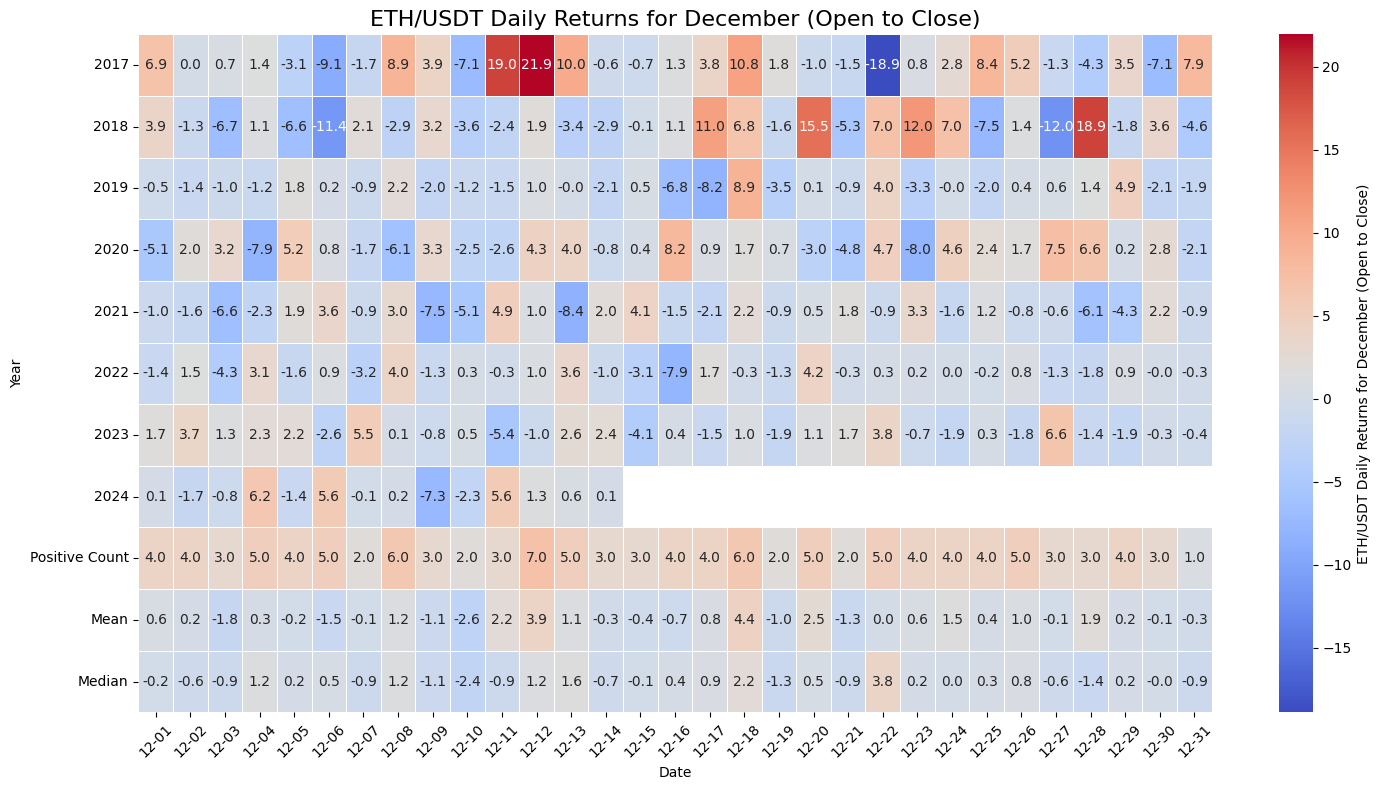

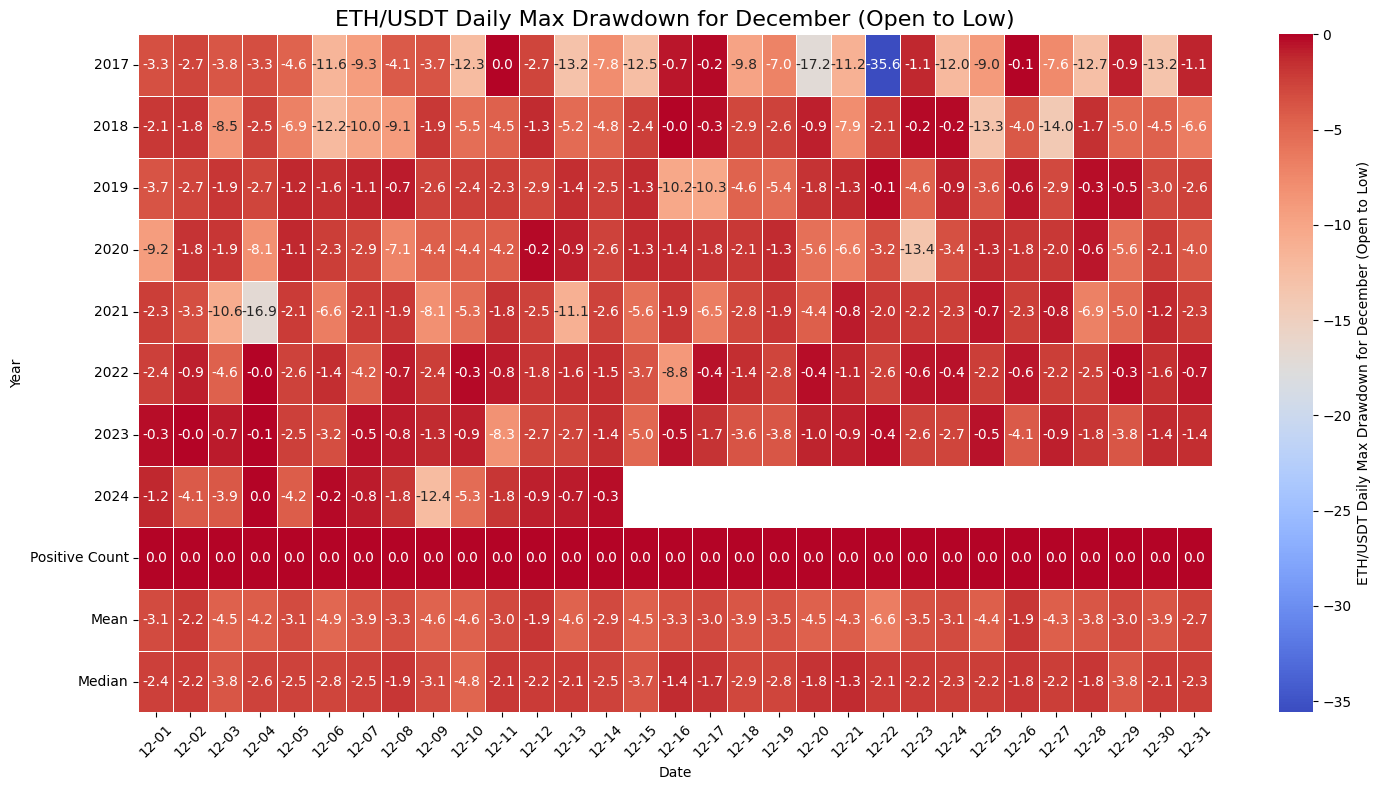

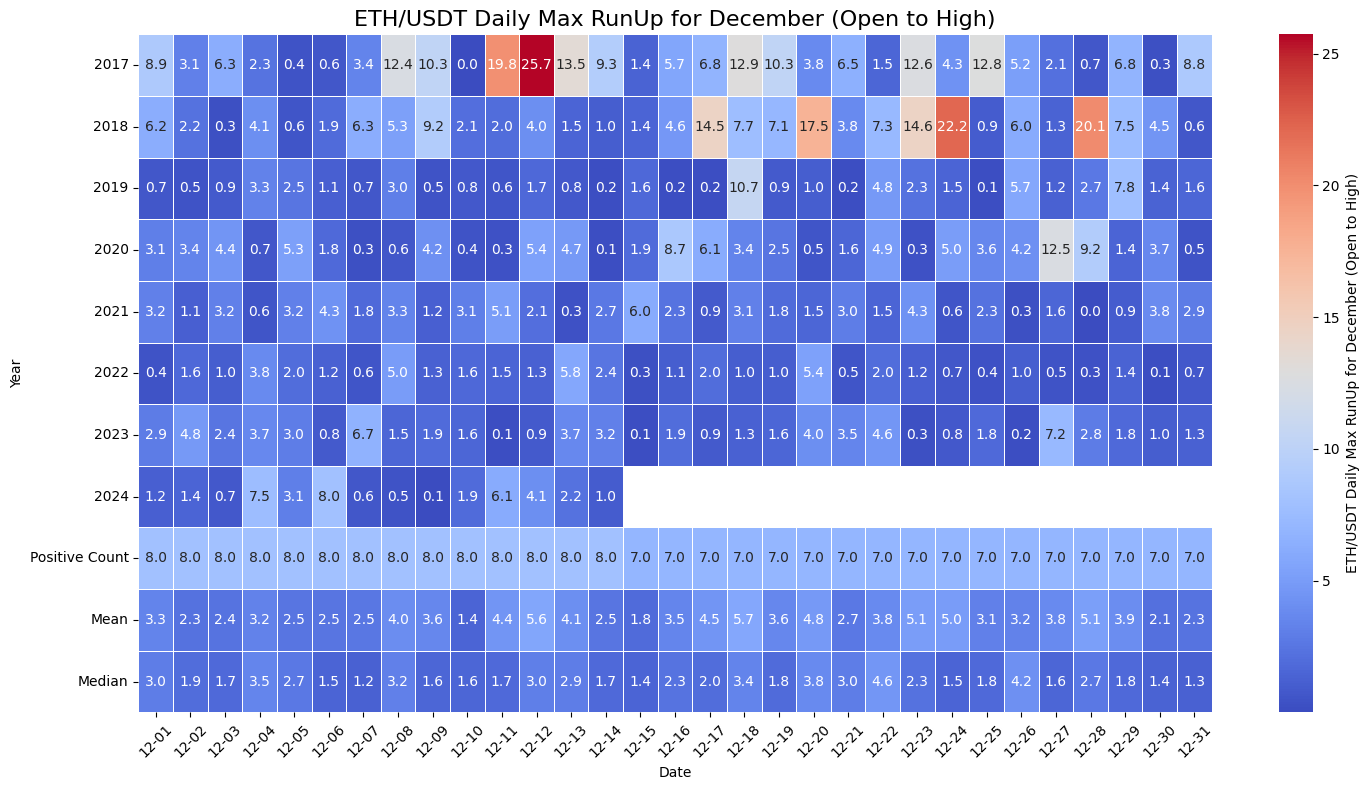

In [2]:
import ccxt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Function to fetch historical data with pagination
def fetch_december_data_paginated(symbol, timeframe='1d', since='2000-12-01T00:00:00Z', limit=500):
    exchange = ccxt.binance()
    all_data = []
    since_timestamp = exchange.parse8601(since)

    while True:
        # Fetch data
        ohlcv = exchange.fetch_ohlcv(symbol, timeframe=timeframe, since=since_timestamp, limit=limit)
        
        # Break if no data is returned
        if not ohlcv:
            break
        
        # Append the data
        all_data.extend(ohlcv)
        
        # Update the 'since' timestamp to the last timestamp from the fetched data
        since_timestamp = ohlcv[-1][0] + 1  # Add 1 millisecond to avoid overlap
    
    # Convert to DataFrame
    df = pd.DataFrame(all_data, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
    df.set_index('timestamp', inplace=True)

    # Filter for December only
    df = df[df.index.month == 12]

    # Extract year for the pivot table
    df['year'] = df.index.year
    df['date'] = df.index.strftime('%m-%d')  # Format dates as MM-DD for columns
    return df

# Function to calculate daily return (open to close)
def calculate_daily_return(df):
    df['daily_return'] = (df['close'] - df['open']) / df['open'] * 100
    return df

# Function to calculate daily max drawdown (open to low)
def calculate_daily_max_drawdown(df):
    df['daily_max_drawdown'] = (df['low'] - df['open']) / df['open'] * 100
    return df

# Function to calculate daily max runup (open to high)
def calculate_daily_max_runup(df):
    df['daily_max_runup'] = (df['high'] - df['open']) / df['open'] * 100
    return df

# Function to create the pivot table with stats
def create_pivot_table_with_stats(df, value_column):
    # Create the pivot table
    pivot_table = df.pivot_table(values=value_column, index='year', columns='date', aggfunc='mean')

    # Calculate mean and median for each column
    avg_value = pivot_table.mean(axis=0)
    median_value = pivot_table.median(axis=0)

    # Calculate the number of positive values for each column
    positive_count = (pivot_table > 0).sum(axis=0)

    # Add the positive count, mean, and median rows
    pivot_table.loc['Positive Count'] = positive_count
    pivot_table.loc['Mean'] = avg_value
    pivot_table.loc['Median'] = median_value

    return pivot_table

# Function to plot heatmap including mean and median rows
def plot_heatmap_with_stats(title, pivot_table):
    plt.figure(figsize=(15, 8))
    sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="coolwarm", cbar_kws={'label': title}, linewidths=.5)
    plt.title(title, fontsize=16)
    plt.xlabel("Date")
    plt.ylabel("Year")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Main function to fetch data, process it, and display the results
def main_december():
    # Fetch data
    symbol = 'ETH/USDT'
    eth_data = fetch_december_data_paginated(symbol)

    # Calculate daily return
    eth_data = calculate_daily_return(eth_data)

    # Calculate daily max drawdown
    eth_data = calculate_daily_max_drawdown(eth_data)

    # Calculate daily max runup
    eth_data = calculate_daily_max_runup(eth_data)

    # Create and plot the heatmap for daily return
    pivot_table_return = create_pivot_table_with_stats(eth_data, 'daily_return')
    plot_heatmap_with_stats("ETH/USDT Daily Returns for December (Open to Close)", pivot_table_return)

    # Create and plot the heatmap for daily max drawdown
    pivot_table_drawdown = create_pivot_table_with_stats(eth_data, 'daily_max_drawdown')
    plot_heatmap_with_stats("ETH/USDT Daily Max Drawdown for December (Open to Low)", pivot_table_drawdown)

    # Create and plot the heatmap for daily max runup
    pivot_table_runup = create_pivot_table_with_stats(eth_data, 'daily_max_runup')
    plot_heatmap_with_stats("ETH/USDT Daily Max RunUp for December (Open to High)", pivot_table_runup)

# Run the main function
main_december()


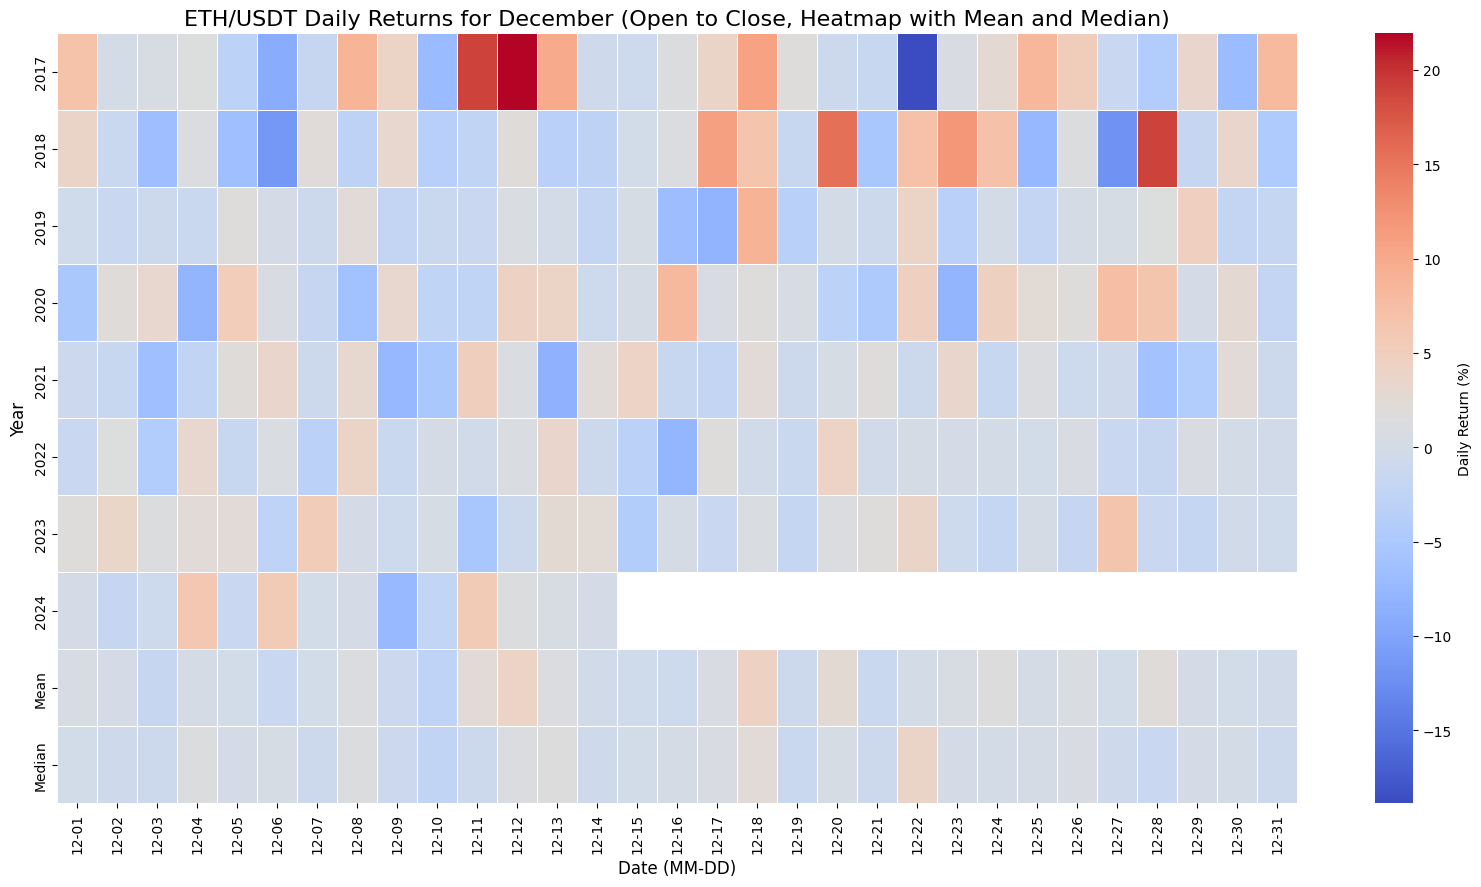

In [3]:
import ccxt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Function to fetch historical data with pagination
def fetch_december_data_paginated(symbol, timeframe='1d', since='2000-12-01T00:00:00Z', limit=500):
    exchange = ccxt.binance()
    all_data = []
    since_timestamp = exchange.parse8601(since)

    while True:
        # Fetch data
        ohlcv = exchange.fetch_ohlcv(symbol, timeframe=timeframe, since=since_timestamp, limit=limit)
        
        # Break if no data is returned
        if not ohlcv:
            break
        
        # Append the data
        all_data.extend(ohlcv)
        
        # Update the 'since' timestamp to the last timestamp from the fetched data
        since_timestamp = ohlcv[-1][0] + 1  # Add 1 millisecond to avoid overlap
    
    # Convert to DataFrame
    df = pd.DataFrame(all_data, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
    df.set_index('timestamp', inplace=True)

    # Filter for December only
    df = df[df.index.month == 12]

    # Extract year for the pivot table
    df['year'] = df.index.year
    df['date'] = df.index.strftime('%m-%d')  # Format dates as MM-DD for columns
    return df

# Function to calculate daily return (open to close)
def calculate_daily_return(df):
    df['daily_return'] = (df['close'] - df['open']) / df['open'] * 100
    return df

# Function to create and display a heatmap
def create_heatmap_with_stats(df, value_column):
    # Create the pivot table
    pivot_table = df.pivot_table(values=value_column, index='year', columns='date', aggfunc='mean')

    # Calculate mean and median for each column
    avg_value = pivot_table.mean(axis=0)
    median_value = pivot_table.median(axis=0)

    # Add mean and median as rows
    pivot_table.loc['Mean'] = avg_value
    pivot_table.loc['Median'] = median_value

    # Create the heatmap
    plt.figure(figsize=(20, 10))
    sns.heatmap(pivot_table, cmap="coolwarm", annot=False, fmt=".2f", linewidths=0.5, cbar_kws={'label': 'Daily Return (%)'})
    plt.title("ETH/USDT Daily Returns for December (Open to Close, Heatmap with Mean and Median)", fontsize=16)
    plt.xlabel("Date (MM-DD)", fontsize=12)
    plt.ylabel("Year", fontsize=12)
    plt.show()

# Main function to fetch data, process it, and display the results
def main_december():
    # Fetch data
    symbol = 'ETH/USDT'
    eth_data = fetch_december_data_paginated(symbol)

    # Calculate daily return
    eth_data = calculate_daily_return(eth_data)

    # Create and display the heatmap
    create_heatmap_with_stats(eth_data, 'daily_return')

# Run the main function
main_december()


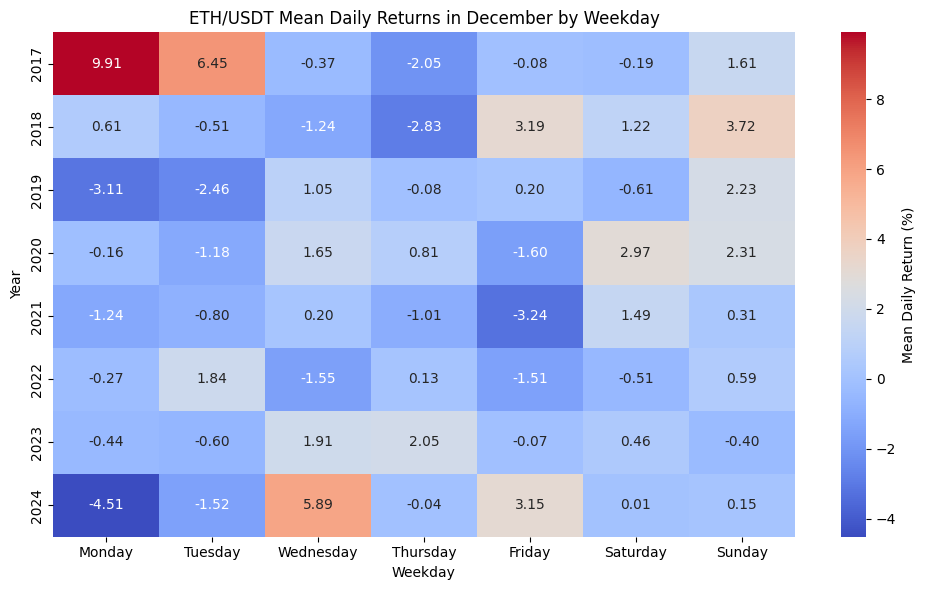

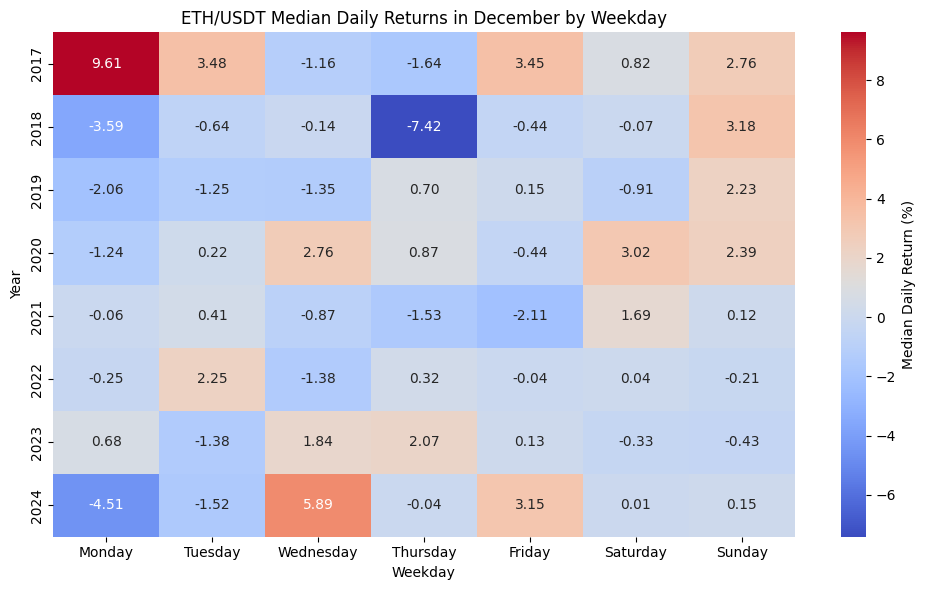

In [4]:
import ccxt
import pandas as pd
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import seaborn as sns

# Function to fetch historical data with pagination
def fetch_december_data_paginated(symbol, timeframe='1d', since='2000-12-01T00:00:00Z', limit=500):
    exchange = ccxt.binance()
    all_data = []
    since_timestamp = exchange.parse8601(since)

    while True:
        # Fetch data
        ohlcv = exchange.fetch_ohlcv(symbol, timeframe=timeframe, since=since_timestamp, limit=limit)
        
        # Break if no data is returned
        if not ohlcv:
            break
        
        # Append the data
        all_data.extend(ohlcv)
        
        # Update the 'since' timestamp to the last timestamp from the fetched data
        since_timestamp = ohlcv[-1][0] + 1  # Add 1 millisecond to avoid overlap
    
    # Convert to DataFrame
    df = pd.DataFrame(all_data, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
    df.set_index('timestamp', inplace=True)

    # Filter for December only
    df = df[df.index.month == 12]

    # Extract year and weekday for the pivot table
    df['year'] = df.index.year
    
    # Use strftime('%A') to get the full English name of the weekday (e.g., 'Monday')
    df['weekday'] = df.index.strftime('%A')  # This returns full weekday names (Monday, Tuesday, etc.)
    
    return df

# Function to calculate daily return (open to close)
def calculate_daily_return(df):
    df['daily_return'] = (df['close'] - df['open']) / df['open'] * 100
    return df

# Function to create a heatmap based on weekdays and years
def create_heatmap(df, value_column, aggregation, title):
    # Create a pivot table with years as rows and weekdays as columns
    heatmap_data = df.pivot_table(values=value_column, index='year', columns='weekday', aggfunc=aggregation)

    # Reorder columns to align with the traditional week order (Monday to Sunday)
    week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    heatmap_data = heatmap_data[week_order]

    # Plot the heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'label': f'{aggregation.title()} Daily Return (%)'})
    plt.title(title)
    plt.xlabel("Weekday")
    plt.ylabel("Year")
    plt.tight_layout()
    plt.show()

# Main function to fetch data, process it, and display the results
def main_december():
    # Fetch data
    symbol = 'ETH/USDT'
    eth_data = fetch_december_data_paginated(symbol)

    # Calculate daily return
    eth_data = calculate_daily_return(eth_data)

    # Create and display the heatmaps
    create_heatmap(eth_data, 'daily_return', 'mean', "ETH/USDT Mean Daily Returns in December by Weekday")
    create_heatmap(eth_data, 'daily_return', 'median', "ETH/USDT Median Daily Returns in December by Weekday")

# Run the main function
main_december()


In [5]:
import ccxt
import pandas as pd
from IPython.display import display

# Function to fetch historical data with pagination
def fetch_december_data_paginated(symbol, timeframe='1d', since='2000-12-01T00:00:00Z', limit=500):
    exchange = ccxt.binance()
    all_data = []
    since_timestamp = exchange.parse8601(since)

    while True:
        # Fetch data
        ohlcv = exchange.fetch_ohlcv(symbol, timeframe=timeframe, since=since_timestamp, limit=limit)
        
        # Break if no data is returned
        if not ohlcv:
            break
        
        # Append the data
        all_data.extend(ohlcv)
        
        # Update the 'since' timestamp to the last timestamp from the fetched data
        since_timestamp = ohlcv[-1][0] + 1  # Add 1 millisecond to avoid overlap
    
    # Convert to DataFrame
    df = pd.DataFrame(all_data, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
    df.set_index('timestamp', inplace=True)

    # Filter for December only
    df = df[df.index.month == 12]

    # Extract year and weekday for the pivot table
    df['year'] = df.index.year
    df['weekday'] = df.index.strftime('%A')  # This returns full weekday names (Monday, Tuesday, etc.)
    
    return df

# Function to calculate daily return (open to close)
def calculate_daily_return(df):
    df['daily_return'] = (df['close'] - df['open']) / df['open'] * 100
    return df

# Function to highlight positive values with green
def highlight_positive(val):
    return 'background-color: green' if val > 0 else ''  # Green for positive, no highlight for non-positive

# Function to display the data with highlights
def display_with_highlights(df):
    # Create pivot tables for mean and median
    mean_df = df.pivot_table(values='daily_return', index='year', columns='weekday', aggfunc='mean')
    median_df = df.pivot_table(values='daily_return', index='year', columns='weekday', aggfunc='median')

    # Reorder columns to match traditional weekday order (Monday to Sunday)
    week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    mean_df = mean_df[week_order]
    median_df = median_df[week_order]

    # Apply the highlight function to both tables
    styled_mean_df = mean_df.style.applymap(highlight_positive)
    styled_median_df = median_df.style.applymap(highlight_positive)

    # Display both styled DataFrames
    print("Mean Daily Returns:")
    display(styled_mean_df)
    
    print("Median Daily Returns:")
    display(styled_median_df)

# Main function to fetch data, process it, and display the results
def main_december():
    # Fetch data
    symbol = 'ETH/USDT'
    eth_data = fetch_december_data_paginated(symbol)

    # Calculate daily return
    eth_data = calculate_daily_return(eth_data)

    # Display the DataFrame with highlights
    display_with_highlights(eth_data)

# Run the main function
main_december()


Mean Daily Returns:


C:\Users\nicol\AppData\Local\Temp\ipykernel_15252\3582878078.py:60: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_mean_df = mean_df.style.applymap(highlight_positive)
C:\Users\nicol\AppData\Local\Temp\ipykernel_15252\3582878078.py:61: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_median_df = median_df.style.applymap(highlight_positive)


weekday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
year,,,,,,,
2017,9.909513,6.453305,-0.369703,-2.053127,-0.077878,-0.189773,1.608426
2018,0.609978,-0.513219,-1.242714,-2.833719,3.192959,1.224324,3.719521
2019,-3.113762,-2.463769,1.049795,-0.076862,0.204219,-0.613702,2.225126
2020,-0.162040,-1.176105,1.649443,0.810814,-1.598339,2.973999,2.307421
2021,-1.237370,-0.801111,0.200423,-1.013345,-3.239697,1.490072,0.313302
2022,-0.270457,1.838206,-1.546667,0.129821,-1.511409,-0.507298,0.592756
2023,-0.436524,-0.599727,1.913445,2.053268,-0.074780,0.458224,-0.396929
2024,-4.513742,-1.524977,5.894155,-0.035597,3.146909,0.007948,0.153490


Median Daily Returns:


weekday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
year,,,,,,,
2017,9.609127,3.478677,-1.162095,-1.635281,3.451727,0.817130,2.759515
2018,-3.592108,-0.636871,-0.140030,-7.415148,-0.439524,-0.071582,3.175130
2019,-2.061625,-1.248304,-1.350095,0.704889,0.149908,-0.912619,2.228867
2020,-1.239422,0.219058,2.755464,0.866317,-0.435706,3.015826,2.385431
2021,-0.061749,0.406554,-0.869368,-1.528284,-2.113859,1.689260,0.116821
2022,-0.250582,2.247956,-1.384798,0.323782,-0.040817,0.035246,-0.210127
2023,0.682714,-1.377589,1.843568,2.070338,0.126500,-0.327070,-0.428070
2024,-4.513742,-1.524977,5.894155,-0.035597,3.146909,0.007948,0.153490


Daily Returns by Year and Weekday:


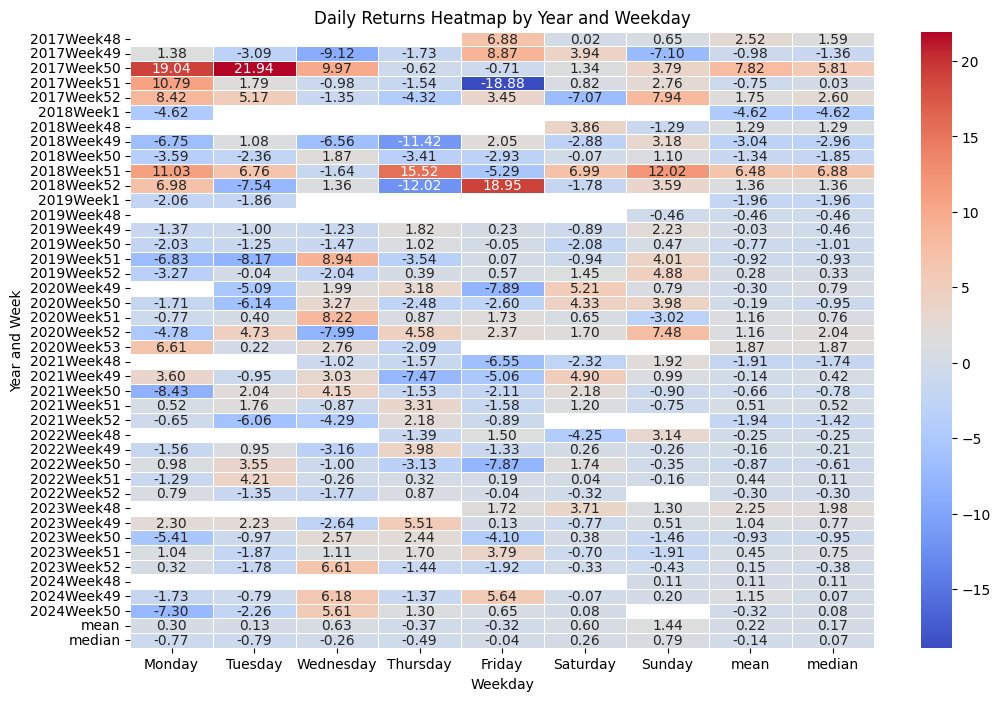

In [6]:
import ccxt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

# Function to fetch historical data with pagination
def fetch_december_data_paginated(symbol, timeframe='1d', since='2000-12-01T00:00:00Z', limit=500):
    exchange = ccxt.binance()
    all_data = []
    since_timestamp = exchange.parse8601(since)

    while True:
        # Fetch data
        ohlcv = exchange.fetch_ohlcv(symbol, timeframe=timeframe, since=since_timestamp, limit=limit)

        # Break if no data is returned
        if not ohlcv:
            break

        # Append the data
        all_data.extend(ohlcv)

        # Update the 'since' timestamp to the last timestamp from the fetched data
        since_timestamp = ohlcv[-1][0] + 1  # Add 1 millisecond to avoid overlap

    # Convert to DataFrame
    df = pd.DataFrame(all_data, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
    df.set_index('timestamp', inplace=True)

    # Filter for December only
    df = df[df.index.month == 12]

    # Extract year and weekday for the pivot table
    df['year'] = df.index.year
    df['weekday'] = df.index.strftime('%A')  # This returns full weekday names (Monday, Tuesday, etc.)

    # Add a 'week' column for grouping
    df['week'] = df.index.isocalendar().week
    df['year_week'] = df['year'].astype(str) + 'Week' + df['week'].astype(str)

    return df

# Function to calculate daily return (open to close)
def calculate_daily_return(df):
    df['daily_return'] = (df['close'] - df['open']) / df['open'] * 100
    return df

# Function to display the data with weekdays as columns
def display_with_highlights(df):
    # Ensure weekdays are in traditional order
    week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    df['weekday'] = pd.Categorical(df['weekday'], categories=week_order, ordered=True)

    # Sort data by year_week and weekday
    df = df.sort_values(by=['year_week', 'weekday'])

    # Create a pivot table with 'year_week' as the index and 'weekday' as the columns
    df_pivot = df.pivot_table(index='year_week', columns='weekday', values='daily_return', aggfunc='first')

    # Calculate mean and median for rows and columns
    df_pivot['mean'] = df_pivot.mean(axis=1)  # Row-wise mean
    df_pivot['median'] = df_pivot.median(axis=1)  # Row-wise median

    # Add mean and median for columns
    df_pivot.loc['mean'] = df_pivot.mean()  # Column-wise mean
    df_pivot.loc['median'] = df_pivot.median()  # Column-wise median

    # Display the result
    print("Daily Returns by Year and Weekday:")
    # display(df_pivot)
    
    # Now generate a heatmap from the pivot table
    plt.figure(figsize=(12, 8))
    sns.heatmap(df_pivot, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, linewidths=0.5)
    plt.title("Daily Returns Heatmap by Year and Weekday")
    plt.xlabel("Weekday")
    plt.ylabel("Year and Week")
    plt.show()

# Main function to fetch data, process it, and display the results
def main_december():
    # Fetch data
    symbol = 'ETH/USDT'
    eth_data = fetch_december_data_paginated(symbol)

    # Calculate daily return
    eth_data = calculate_daily_return(eth_data)

    # Display the DataFrame with highlights and the heatmap
    display_with_highlights(eth_data)

# Run the main function
main_december()


Daily Returns by Year and Weekday:


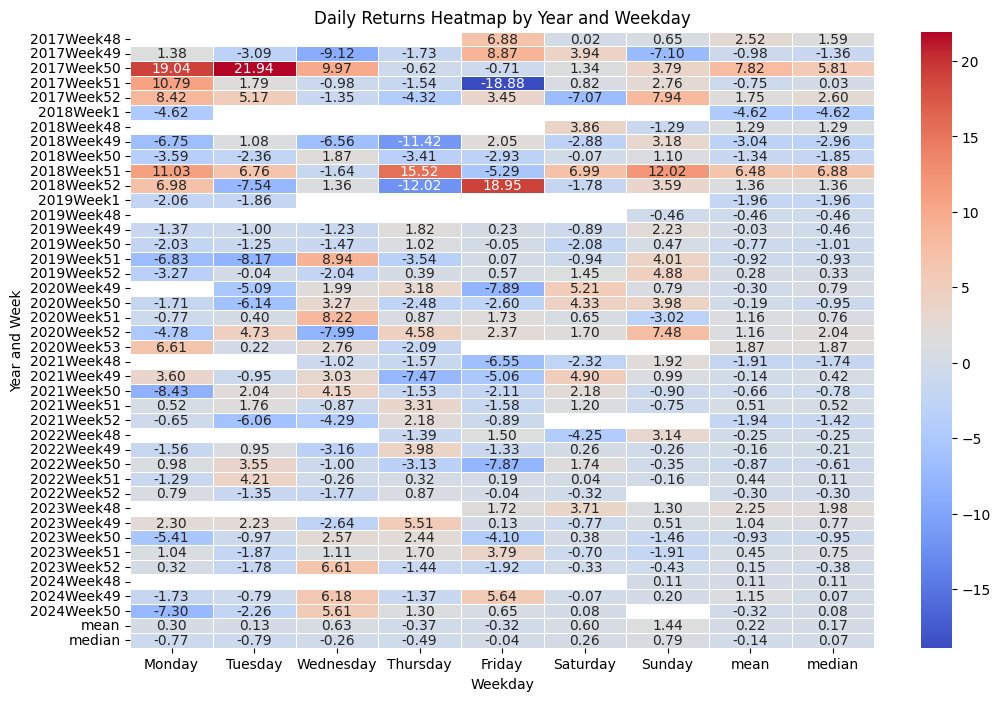

Daily RunUp by Year and Weekday:


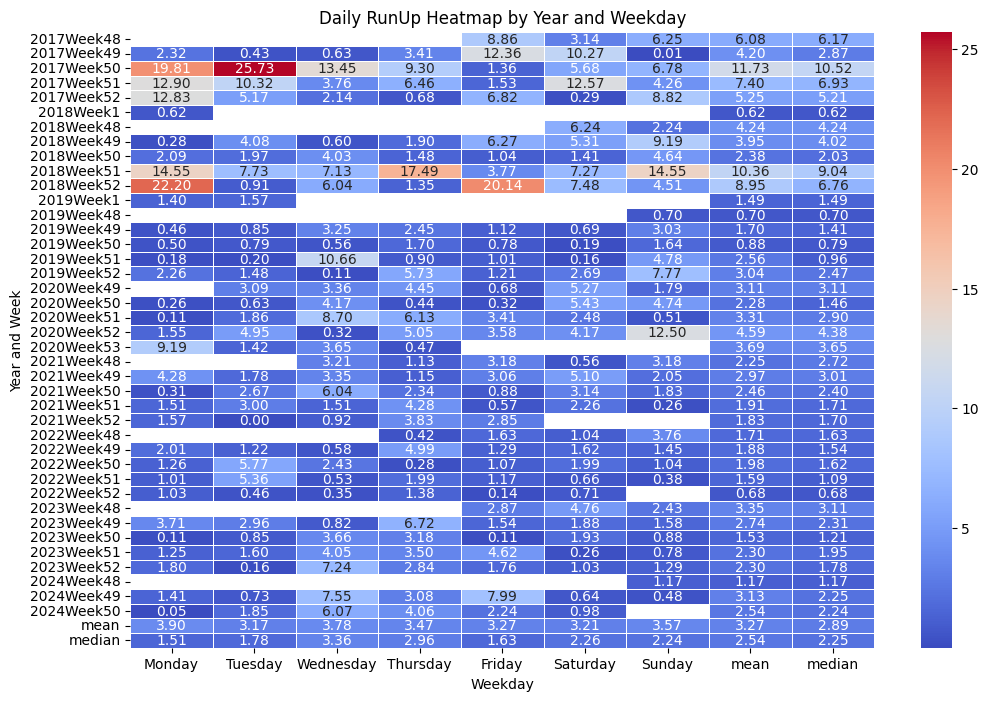

Daily RunDown by Year and Weekday:


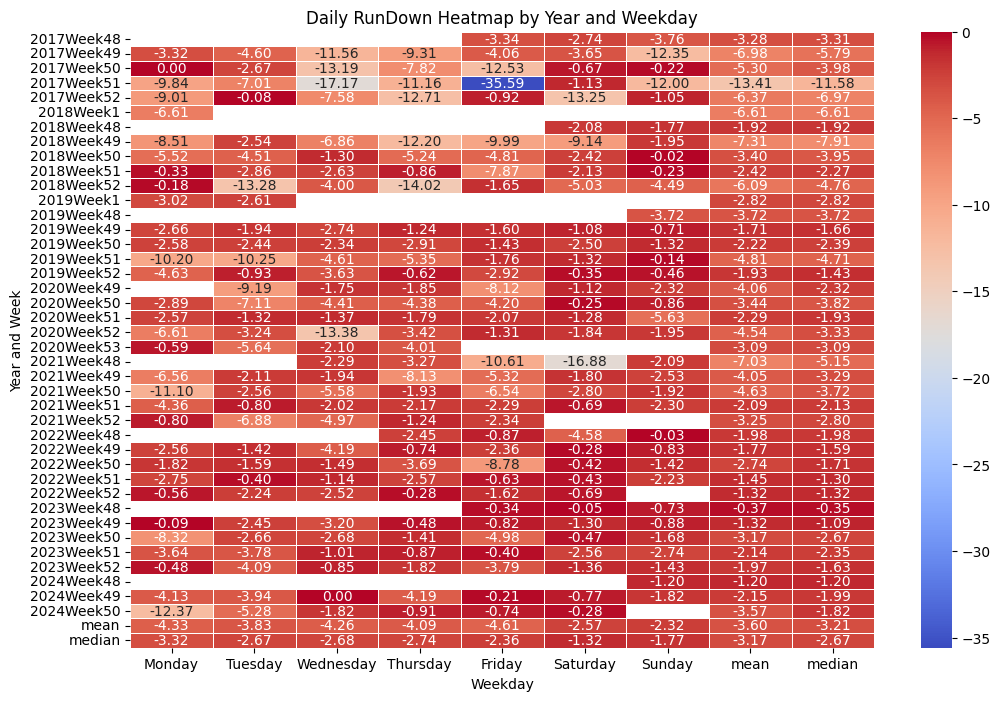

In [7]:
import ccxt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

# Function to fetch historical data with pagination
def fetch_december_data_paginated(symbol, timeframe='1d', since='2000-12-01T00:00:00Z', limit=500):
    exchange = ccxt.binance()
    all_data = []
    since_timestamp = exchange.parse8601(since)

    while True:
        # Fetch data
        ohlcv = exchange.fetch_ohlcv(symbol, timeframe=timeframe, since=since_timestamp, limit=limit)

        # Break if no data is returned
        if not ohlcv:
            break

        # Append the data
        all_data.extend(ohlcv)

        # Update the 'since' timestamp to the last timestamp from the fetched data
        since_timestamp = ohlcv[-1][0] + 1  # Add 1 millisecond to avoid overlap

    # Convert to DataFrame
    df = pd.DataFrame(all_data, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
    df.set_index('timestamp', inplace=True)

    # Filter for December only
    df = df[df.index.month == 12]

    # Extract year and weekday for the pivot table
    df['year'] = df.index.year
    df['weekday'] = df.index.strftime('%A')  # This returns full weekday names (Monday, Tuesday, etc.)

    # Add a 'week' column for grouping
    df['week'] = df.index.isocalendar().week
    df['year_week'] = df['year'].astype(str) + 'Week' + df['week'].astype(str)

    return df

# Function to calculate metrics
def calculate_metrics(df):
    # Daily return (Open to Close)
    df['daily_return'] = (df['close'] - df['open']) / df['open'] * 100

    # Daily RunUp (Open to High)
    df['daily_runup'] = (df['high'] - df['open']) / df['open'] * 100

    # Daily RunDown (Open to Low)
    df['daily_rundown'] = (df['low'] - df['open']) / df['open'] * 100

    return df

# Function to display the data with highlights
def display_with_highlights(df, value_column, title):
    # Ensure weekdays are in traditional order
    week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    df['weekday'] = pd.Categorical(df['weekday'], categories=week_order, ordered=True)

    # Sort data by year_week and weekday
    df = df.sort_values(by=['year_week', 'weekday'])

    # Create a pivot table with 'year_week' as the index and 'weekday' as the columns
    df_pivot = df.pivot_table(index='year_week', columns='weekday', values=value_column, aggfunc='first')

    # Calculate mean and median for rows and columns
    df_pivot['mean'] = df_pivot.mean(axis=1)  # Row-wise mean
    df_pivot['median'] = df_pivot.median(axis=1)  # Row-wise median

    # Add mean and median for columns
    df_pivot.loc['mean'] = df_pivot.mean()  # Column-wise mean
    df_pivot.loc['median'] = df_pivot.median()  # Column-wise median

    # Display the result
    print(f"{title} by Year and Weekday:")
    # display(df_pivot)

    # Now generate a heatmap from the pivot table
    plt.figure(figsize=(12, 8))
    sns.heatmap(df_pivot, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, linewidths=0.5)
    plt.title(f"{title} Heatmap by Year and Weekday")
    plt.xlabel("Weekday")
    plt.ylabel("Year and Week")
    plt.show()

# Main function to fetch data, process it, and display the results
def main_december():
    # Fetch data
    symbol = 'ETH/USDT'
    eth_data = fetch_december_data_paginated(symbol)

    # Calculate metrics
    eth_data = calculate_metrics(eth_data)

    # Display the DataFrame with highlights and heatmaps for each metric
    display_with_highlights(eth_data, 'daily_return', "Daily Returns")
    display_with_highlights(eth_data, 'daily_runup', "Daily RunUp")
    display_with_highlights(eth_data, 'daily_rundown', "Daily RunDown")

# Run the main function
main_december()


Daily Returns by Year and Weekday:


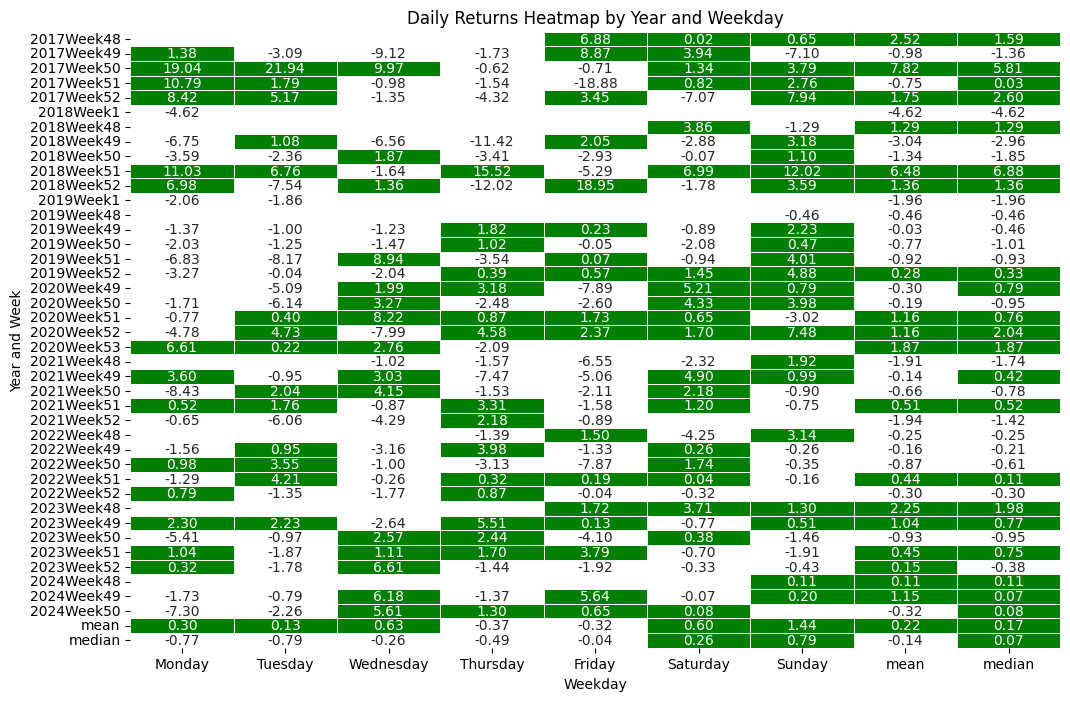

In [8]:
import ccxt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
import matplotlib.colors as mcolors

# Function to fetch historical data with pagination
def fetch_december_data_paginated(symbol, timeframe='1d', since='2000-12-01T00:00:00Z', limit=500):
    exchange = ccxt.binance()
    all_data = []
    since_timestamp = exchange.parse8601(since)

    while True:
        # Fetch data
        ohlcv = exchange.fetch_ohlcv(symbol, timeframe=timeframe, since=since_timestamp, limit=limit)

        # Break if no data is returned
        if not ohlcv:
            break

        # Append the data
        all_data.extend(ohlcv)

        # Update the 'since' timestamp to the last timestamp from the fetched data
        since_timestamp = ohlcv[-1][0] + 1  # Add 1 millisecond to avoid overlap

    # Convert to DataFrame
    df = pd.DataFrame(all_data, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
    df.set_index('timestamp', inplace=True)

    # Filter for December only
    df = df[df.index.month == 12]

    # Extract year and weekday for the pivot table
    df['year'] = df.index.year
    df['weekday'] = df.index.strftime('%A')  # This returns full weekday names (Monday, Tuesday, etc.)

    # Add a 'week' column for grouping
    df['week'] = df.index.isocalendar().week
    df['year_week'] = df['year'].astype(str) + 'Week' + df['week'].astype(str)

    return df

# Function to calculate daily return (open to close)
def calculate_daily_return(df):
    df['daily_return'] = (df['close'] - df['open']) / df['open'] * 100
    return df

# Function to display the data with weekdays as columns
def display_with_highlights(df):
    # Ensure weekdays are in traditional order
    week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    df['weekday'] = pd.Categorical(df['weekday'], categories=week_order, ordered=True)

    # Sort data by year_week and weekday
    df = df.sort_values(by=['year_week', 'weekday'])

    # Create a pivot table with 'year_week' as the index and 'weekday' as the columns
    df_pivot = df.pivot_table(index='year_week', columns='weekday', values='daily_return', aggfunc='first')

    # Calculate mean and median for rows and columns
    df_pivot['mean'] = df_pivot.mean(axis=1)  # Row-wise mean
    df_pivot['median'] = df_pivot.median(axis=1)  # Row-wise median

    # Add mean and median for columns
    df_pivot.loc['mean'] = df_pivot.mean()  # Column-wise mean
    df_pivot.loc['median'] = df_pivot.median()  # Column-wise median

    # Display the result
    print("Daily Returns by Year and Weekday:")
    # display(df_pivot)
    
    # Custom color map: Green for positive values, white for negative values
    # We will use a 'two-step' colormap with green for positive values and white for negative values.
    cmap = mcolors.ListedColormap(['white', 'green'])

    # Normalization to map values from 0 to 1, with negative values being mapped to 0 (white) and positive to 1 (green)
    norm = mcolors.TwoSlopeNorm(vmin=df_pivot.min().min(), vcenter=0, vmax=df_pivot.max().max())

    # Now generate a heatmap from the pivot table
    plt.figure(figsize=(12, 8))
    sns.heatmap(df_pivot, annot=True, cmap=cmap, fmt='.2f', cbar=False, linewidths=0.5, norm=norm)
    plt.title("Daily Returns Heatmap by Year and Weekday")
    plt.xlabel("Weekday")
    plt.ylabel("Year and Week")
    plt.show()

# Main function to fetch data, process it, and display the results
def main_december():
    # Fetch data
    symbol = 'ETH/USDT'
    eth_data = fetch_december_data_paginated(symbol)

    # Calculate daily return
    eth_data = calculate_daily_return(eth_data)

    # Display the DataFrame with highlights and the heatmap
    display_with_highlights(eth_data)

# Run the main function
main_december()


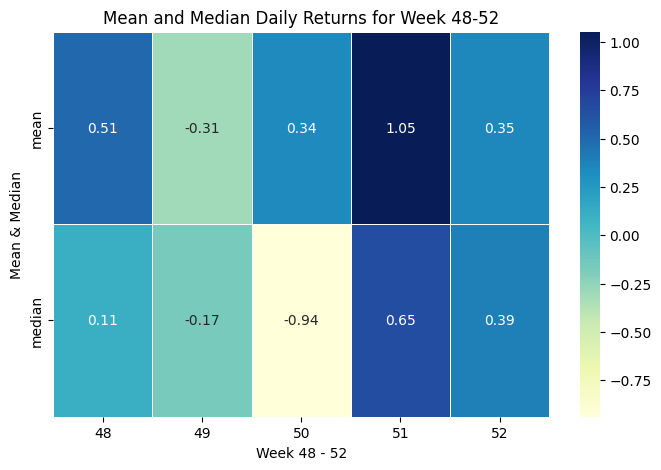

In [9]:
import ccxt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
import matplotlib.colors as mcolors

# Function to fetch historical data with pagination
def fetch_december_data_paginated(symbol, timeframe='1d', since='2000-12-01T00:00:00Z', limit=500):
    exchange = ccxt.binance()
    all_data = []
    since_timestamp = exchange.parse8601(since)

    while True:
        # Fetch data
        ohlcv = exchange.fetch_ohlcv(symbol, timeframe=timeframe, since=since_timestamp, limit=limit)

        # Break if no data is returned
        if not ohlcv:
            break

        # Append the data
        all_data.extend(ohlcv)

        # Update the 'since' timestamp to the last timestamp from the fetched data
        since_timestamp = ohlcv[-1][0] + 1  # Add 1 millisecond to avoid overlap

    # Convert to DataFrame
    df = pd.DataFrame(all_data, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
    df.set_index('timestamp', inplace=True)

    # Filter for December only
    df = df[df.index.month == 12]

    # Extract year, week, and weekday for the pivot table
    df['year'] = df.index.year
    df['week'] = df.index.isocalendar().week
    df['weekday'] = df.index.strftime('%A')

    # Add a 'year_week' column for grouping
    df['year_week'] = df['year'].astype(str) + '-W' + df['week'].astype(str)

    return df

# Function to calculate daily return (open to close)
def calculate_daily_return(df):
    df['daily_return'] = (df['close'] - df['open']) / df['open'] * 100
    return df

# Function to display the data with weekdays as columns
def display_mean_median_heatmap(df):
    # Filter for Week48 to Week52
    df_filtered = df[df['week'].isin([48, 49, 50, 51, 52])]

    # Calculate mean and median for each week (week 48 to week 52)
    mean_values = df_filtered.groupby(['year', 'week'])['daily_return'].mean().unstack(fill_value=None)
    median_values = df_filtered.groupby(['year', 'week'])['daily_return'].median().unstack(fill_value=None)

    # Combine mean and median into one DataFrame
    result = pd.DataFrame({
        'mean': mean_values.loc[:, 48:52].mean(axis=0),
        'median': median_values.loc[:, 48:52].median(axis=0)
    }).T

    # Plot the heatmap
    plt.figure(figsize=(8, 5))
    sns.heatmap(result, annot=True, cmap="YlGnBu", fmt='.2f', cbar=True, linewidths=0.5)
    plt.title('Mean and Median Daily Returns for Week 48-52')
    plt.ylabel('Mean & Median')
    plt.xlabel('Week 48 - 52')
    plt.show()

# Main function to fetch data, process it, and display the results
def main_december():
    # Fetch data
    symbol = 'ETH/USDT'
    eth_data = fetch_december_data_paginated(symbol)

    # Calculate daily return
    eth_data = calculate_daily_return(eth_data)

    # Display the heatmap for mean and median
    display_mean_median_heatmap(eth_data)

# Run the main function
main_december()


In [10]:
# Function to calculate the mean and median of daily returns for each weekday across all years
def calculate_weekday_stats(df):
    weekday_stats = df.groupby('weekday')['daily_return'].agg(['mean', 'median'])
    return weekday_stats

# Function to calculate and display the mean and median for each weekday
def display_weekday_statistics(df):
    weekday_stats = calculate_weekday_stats(df)
    
    # Print the mean and median for each weekday
    print("\nMean and Median of Daily Returns by Weekday (All Years Combined):")
    print(weekday_stats)

# Main function to fetch data, process it, and display the results
def main_december_statistics():
    # Fetch data
    symbol = 'ETH/USDT'
    eth_data = fetch_december_data_paginated(symbol)

    # Calculate daily return
    eth_data = calculate_daily_return(eth_data)

    # Display the mean and median statistics for each weekday
    display_weekday_statistics(eth_data)

# Run the function to get the statistics
main_december_statistics()



Mean and Median of Daily Returns by Weekday (All Years Combined):
               mean    median
weekday                      
Friday    -0.324401  0.014720
Monday     0.302065 -1.026618
Saturday   0.598360  0.169081
Sunday     1.439459  0.722341
Thursday  -0.365955 -0.616977
Tuesday    0.133140 -0.870362
Wednesday  0.632946 -0.564928
